In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # rotation_range=90,
    brightness_range=(0.5, 1),
    # shear_range=0.2,
    # zoom_range=0.2,
    channel_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.3
)

In [3]:
root_dir = r'C:\Users\91965\Downloads\archive\caltech-101'

img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training"
)

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation"
)

Found 6444 images belonging to 102 classes.
Found 2700 images belonging to 102 classes.


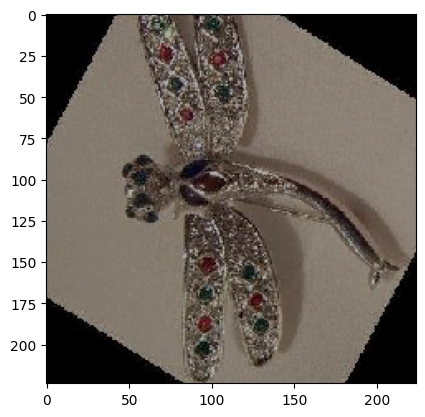

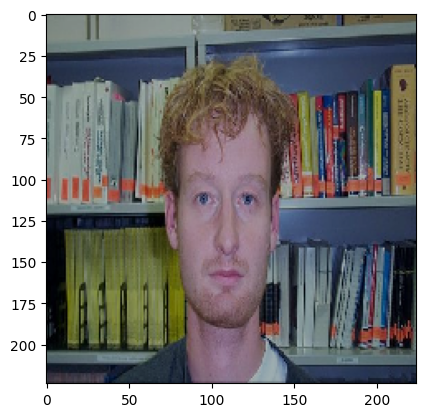

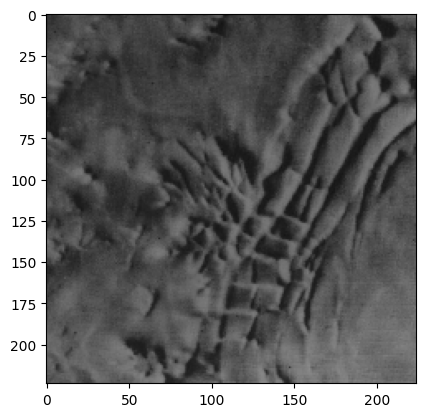

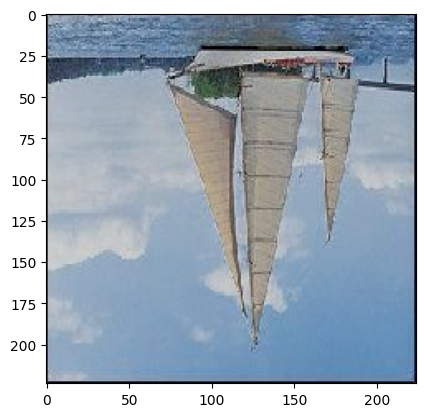

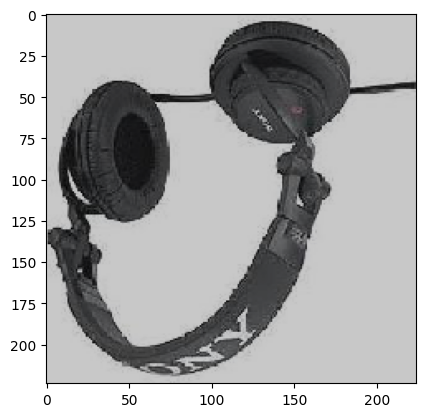

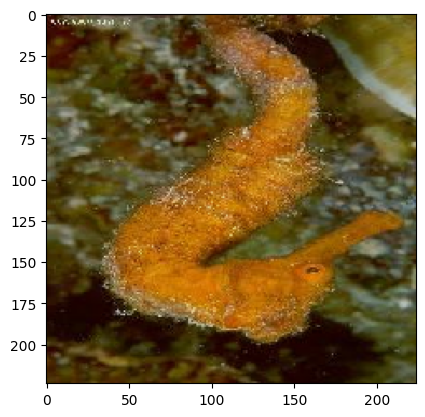

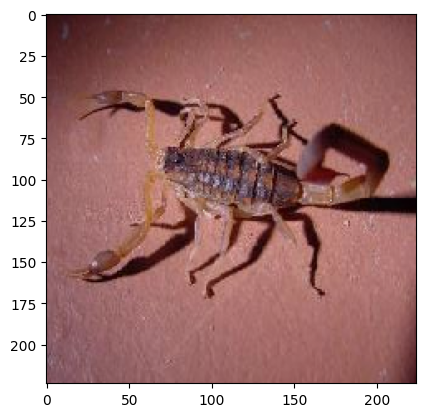

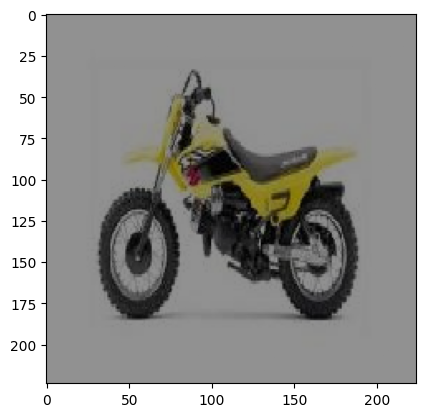

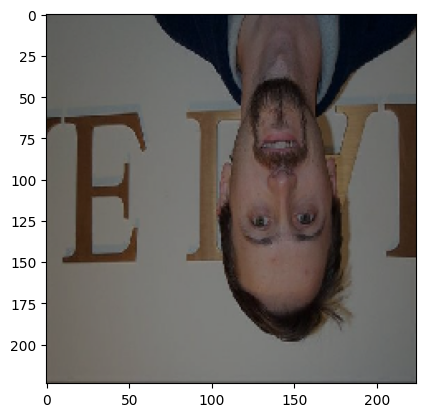

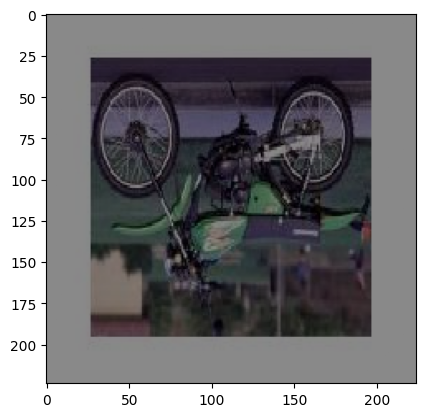

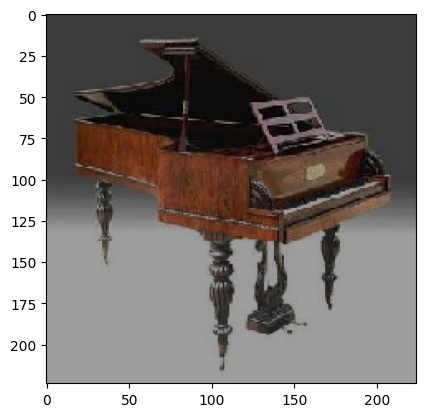

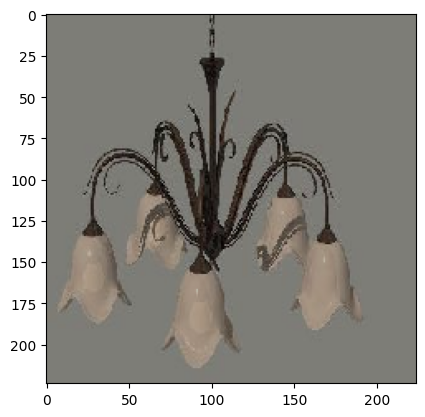

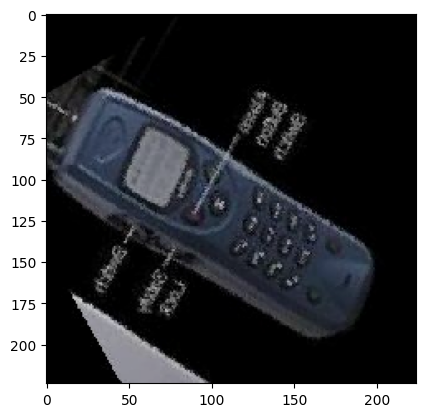

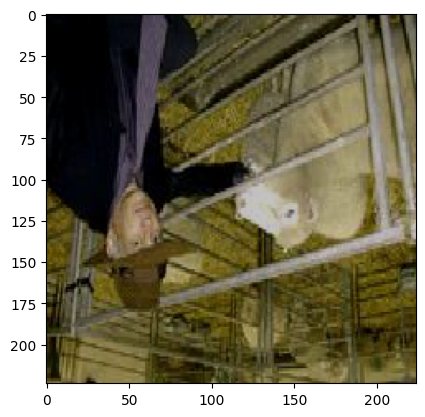

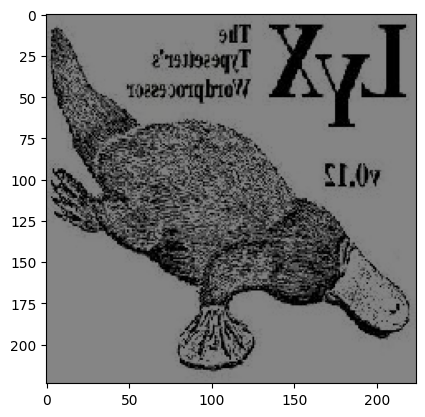

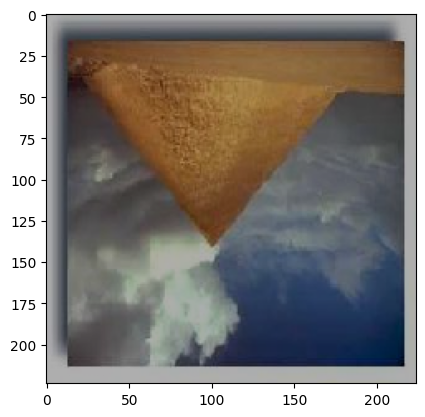

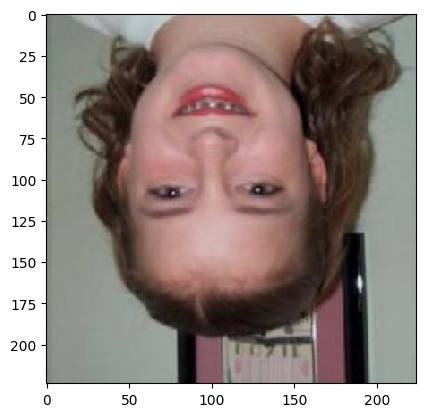

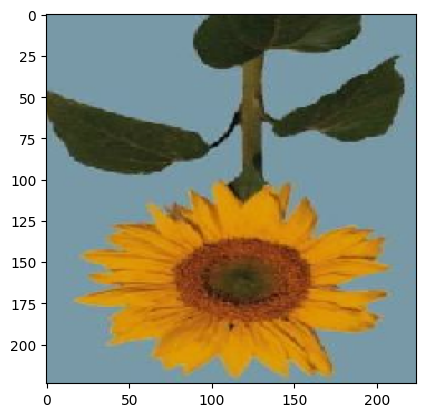

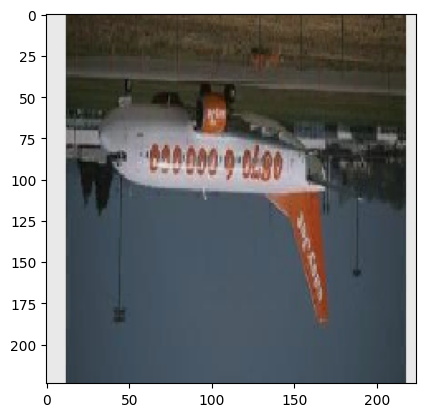

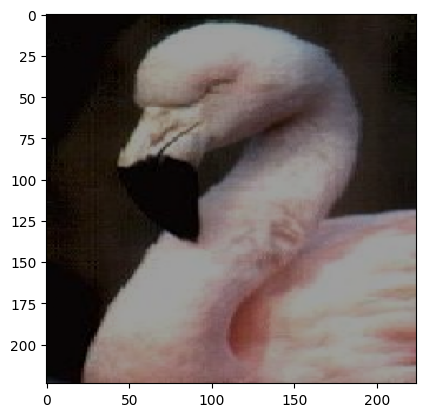

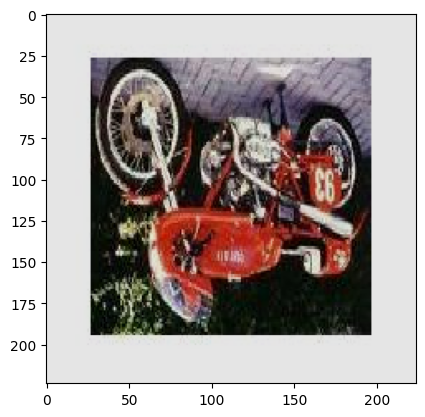

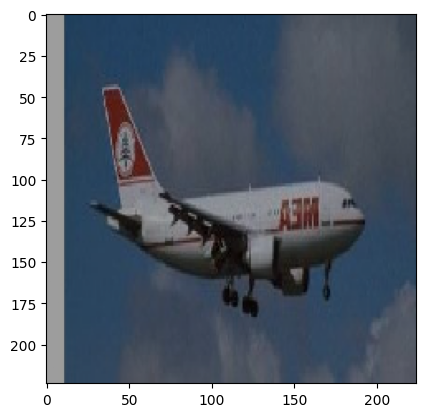

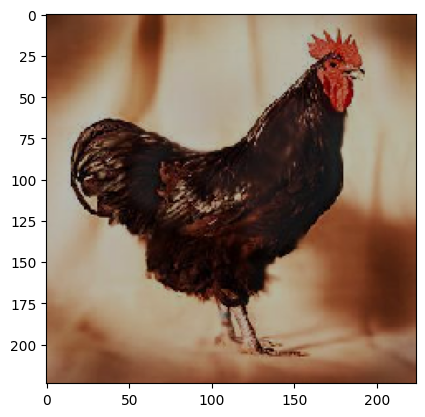

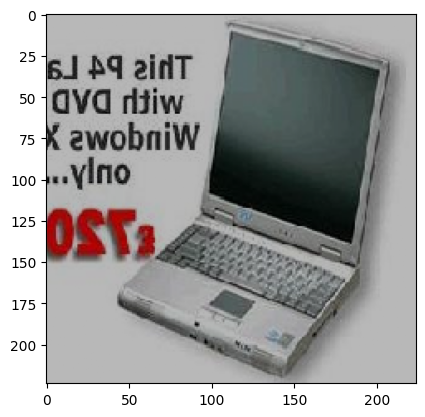

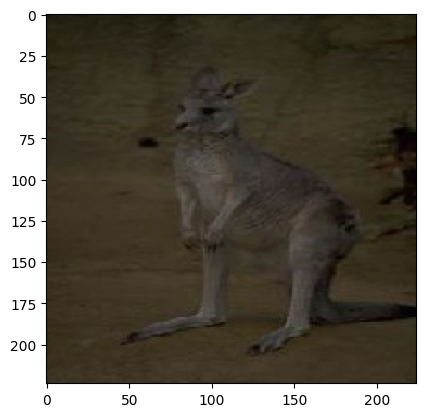

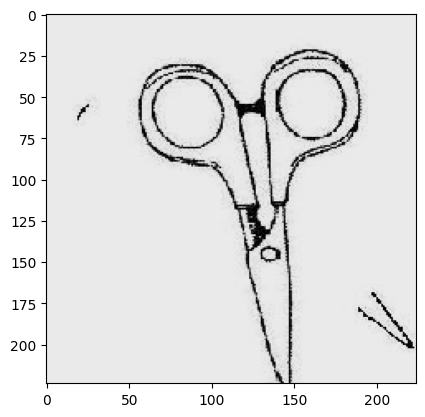

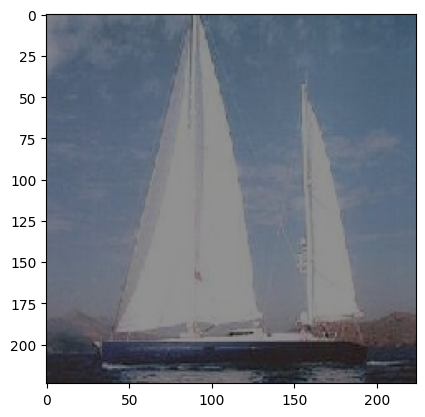

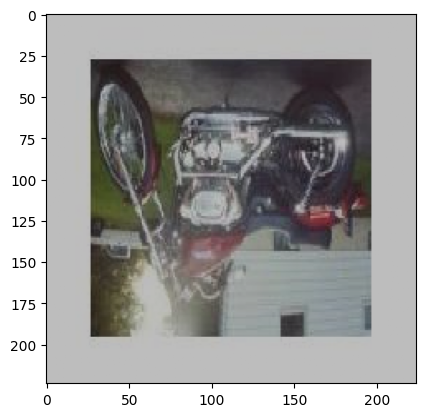

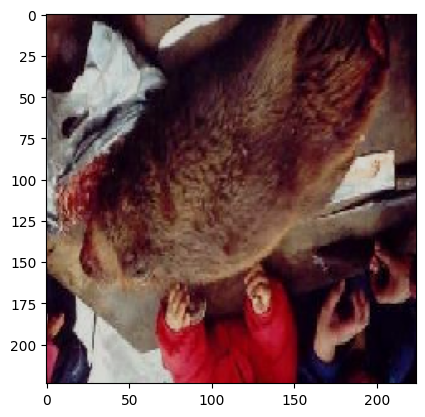

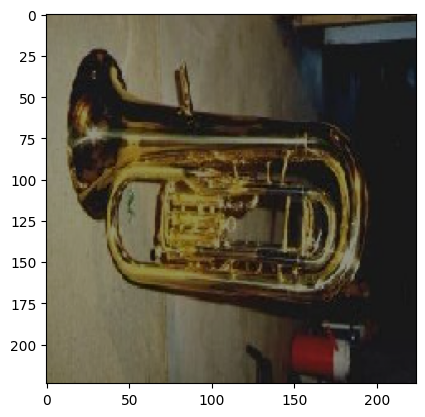

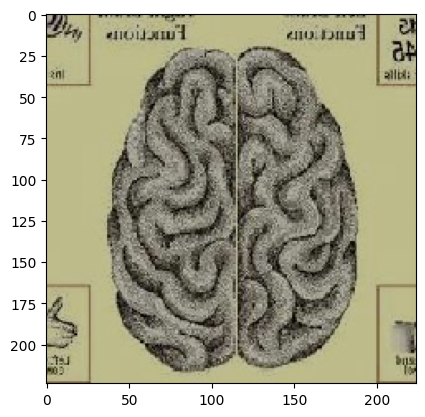

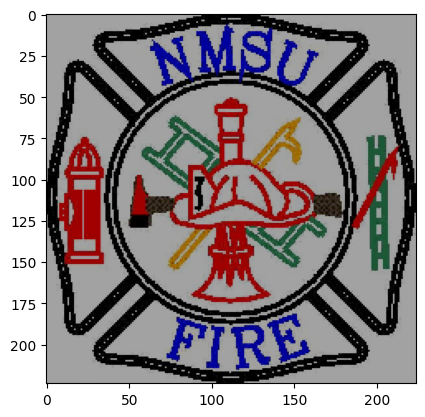

In [4]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
  plt.imshow(img)
  plt.show()

In [5]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
include_top=False,
weights = "imagenet"
)

In [6]:
base_model.trainable = False

In [7]:
model = tf.keras.Sequential([
base_model,
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(102, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 102)               835686    
                                                                 
Total params: 22638470 (86.36 MB)
Trainable params: 835686 (3.19 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.fit(img_generator_flow_train, 
          validation_data=img_generator_flow_valid, 
          steps_per_epoch=20, 
          epochs=5)

Epoch 1/5

20/20 [==============================] - 330s 16s/step - loss: 8.3963 - categorical_accuracy: 0.2719 - val_loss: 5.9512 - val_categorical_accuracy: 0.4270
Epoch 2/5
20/20 [==============================] - 305s 16s/step - loss: 4.4890 - categorical_accuracy: 0.5266 - val_loss: 3.0698 - val_categorical_accuracy: 0.5959
Epoch 3/5
20/20 [==============================] - 291s 15s/step - loss: 2.4846 - categorical_accuracy: 0.6516 - val_loss: 2.1261 - val_categorical_accuracy: 0.6504
Epoch 4/5
20/20 [==============================] - 305s 16s/step - loss: 1.9582 - categorical_accuracy: 0.6922 - val_loss: 2.1193 - val_categorical_accuracy: 0.6841
Epoch 5/5
20/20 [==============================] - ETA: 0s - loss: 1.8538 - categorical_accuracy: 0.7266

In [ ]:
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics = [tf.keras.metrics.CategoricalAccuracy()])
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=5)